In [ ]:
from langchain.llms import OpenAI


: 

In [ ]:
import os
os.environ["OPEN_API_KEY"] = " " #importing api key

In [ ]:
#creating LLM model
#llm=OpenAI(temperature= 0.7) #tuning and check the results
# error: please mention openai key, hence passing openapi key as param

llm=OpenAI(openai_api_key== os.environ["OPEN_API_KEY"],temperature= 0.7)


In [ ]:
text+ "What is the capital of Karnataka?"
print(llm.predict(text))


In [ ]:
# https://platform.openai.com/docs/models/overview, by default gpt 3.5 turbo is called in model. 





In [ ]:
os.environ["HUGGINGFACEHUB_API_TOKEN"]=" "
# create api in huggingface site and paste token here

In [ ]:
from langchain import HuugingFaceHub

In [ ]:
#repo ID: huggingface's unique repository ID. In my profile, it will be mentioned google/flan------
llm_huggingface= HuggingFaceHub(repo_id="google/flan-t5-large", model_kwags={"temperature": 0, "max_length": 64})
#max string length= 64


In [ ]:
output=llm_huggingface.oredict("Can you tell me the capital of Italy?")
print(output)

#here the output is straight forwardlike Rome as output. (HUgginface's opensource OP)
# langchain used to print o/p like: Capital of Italy is Rome

In [ ]:
output=llm_huggingface.oredict("Can you write a peom about puppies?")
print(output)


In [ ]:
#checking the same question in langchain
llm.predict("Can you write a peom about puppies?")


### PROMPT TEMPLATE

In [ ]:
from langchain.prompts import PromptTemplate
#prompt template suggests my model what kind of ip it can expect and also what kind of op it will give

#defiing prompt template: define ip variables, 

prompt_template= PromptTemplate(input_variables= ['country'],
                template= "Tell me the capital of this {country}", #when I pass ip, it will be replaced in this sentence
                )

#ex: openai understands that the country variable is dynamic and provided during run time.
# When I pass input_variable= Turkey, openai first translates into, "tell me the capital of Turkey"


prompt_template.format(country="Turkey") 

In [ ]:
#predict
#llm.predict(prompt_template= prompt_template) error: text is missing (text arg is missing, passing text)
#llm.predict(prompt_template= prompt_template, text= ["Turkey"]) 
# error: expected string. to run llm, use generate instead 

#Hence these are not right way to call prompt template. 

# TO CALL PROMPT, I NEED TO USE CHAIN, WHICH COMBINES MULTIPLE PROMPT AND THEN PREDICTION BE DONE




In [ ]:
from langchain.chains import LLMChain

#creating chain
chain=LLMChain(llm=llm, prompt= prompt_template)



In [ ]:
#running chain

chain.run("Turkey")



## Combining multiple chain using Simple Sequential Chain

In [ ]:
capital_prompt=prompt_template(input_variables= ["country"],
                                 template= "Please tell me the capital of {country}")

#creating chain

# capital_chain= LLMChain(llm=llm, prompt_template= capital_prompt) error

capital_chain= LLMChain(llm=llm, prompt= capital_prompt) # argument in LLMChain() should be prompt, not prompt_template

#creating another prompt template

restaurant_template= PromptTemplate(input_variable= ['capital'], 
                                template= "Suggest me great restaurants in {capital}")




In [ ]:
#creating another chain for famous restautant template

restaurant_chain= LLMChain( llm=llm, prompt= restaurant_template)



Input 1-> chain 1: get the ouput from chain 1-> pass op from C1 to next chain. This will be cofusing to my model
Hence, using sequence so that model understands the sequence of IP1, OP1, OP2 and so on.
Example: Input 1: Turkey. OP1: Ankara. Ankara is passed to chain 2 and OP2 will be Trilye Restaurant which is famous restaurant of Turkey's capital 

In [ ]:
from langchain.chains import SimpleSequenceChain
chain= SequentialChain(chains= [capital_chain, restaurant_chain],
                     input_variable= ['country'],
                       ouput_variable=['capital', "places"]  )

In [ ]:
# to run chain: pass the input variables in key value chain: my input be country: Turkey 

# 

chain({'country': 'Turkey'})

### Chat models with ChatOpenAI

- 3 schemas
- Human Message: When convo happens, ip be provided by human. 
- system message: If deafult message shows up like related to domain: A message from bot saying: Hey how may I help you with billing? 
- AI message: schema which gives the output by AI using the model 


In [ ]:
from langchain.chat_models import ChatOpenAI

#schemas

from langchain.schema import HumanMessage, SystemMessage, AIMessage


In [ ]:
chatllm= ChatOpenAI(openai_api_key= os.environ["OPEN_API_KEY"], temperature= 0.6, model= 'gpt-3.5-turbo')




In [ ]:
chatllm

In [ ]:
chatllm([
    SystemMessage(content= "You're a comedian AI assistant"),# Im telling chatbot to behave like, instructing chatbot
    HumanMessage(content= "Please get me some comedy punchlines on AI ") # this is input
])

# call chatllm passing 2 arguments SYstem and Human message. when I execut this, I will get output which is 
#nothing but AIMessage 

### Prompt Template + LLM + Output parser

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import ChatPromptTemplate

# to use output parser
from langchain.schema import BaseOutputParser


In [ ]:
#definfing output parser in form of class. create class called Commaseperatedoutput which inherits from BaseOutputParser

class Commaseperatedoutput(BaseOutputParser):
    def parse(self, text: str):
        return text.strip().split(",")

In [ ]:
template= "You're a helpful assisstant.When a user give any input, you should generate 5 words sysnonyms with comma separator" 
#this is system template


human_template= "{text}"

chatprompt= ChatPromptTemplate.from_messages([
    ("system", template),
    ("human", human_template)
])

In [ ]:
# combining using chain

chain= chatprompt|chatllm|Commaseperatedoutput
# chain chatprompt and model chatllm, at last OP parser

In [ ]:
chain.invoke({"text":"intelligent"}) # chain is always invoked in key value pair


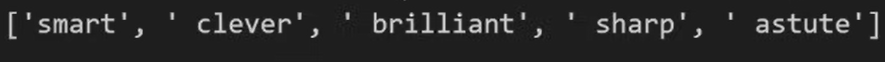